Welcome to the journey of learning Crystal Plasticity!
What do you want to learn today?
1. Visualize Unit Cells
2. Visualize Slip Planes
3. Visualize Schmid's Law
Enter your choice (1, 2, or 3): 2
Select Crystal Structure:
1. BCC
2. FCC
Enter your choice (1 or 2): 1
Select Slip Plane:
1. 001
2. 100
3. 010
4. 112
5. 123
6. 011
Enter your choice (1, 2, 3, 4, 5, or 6): 2


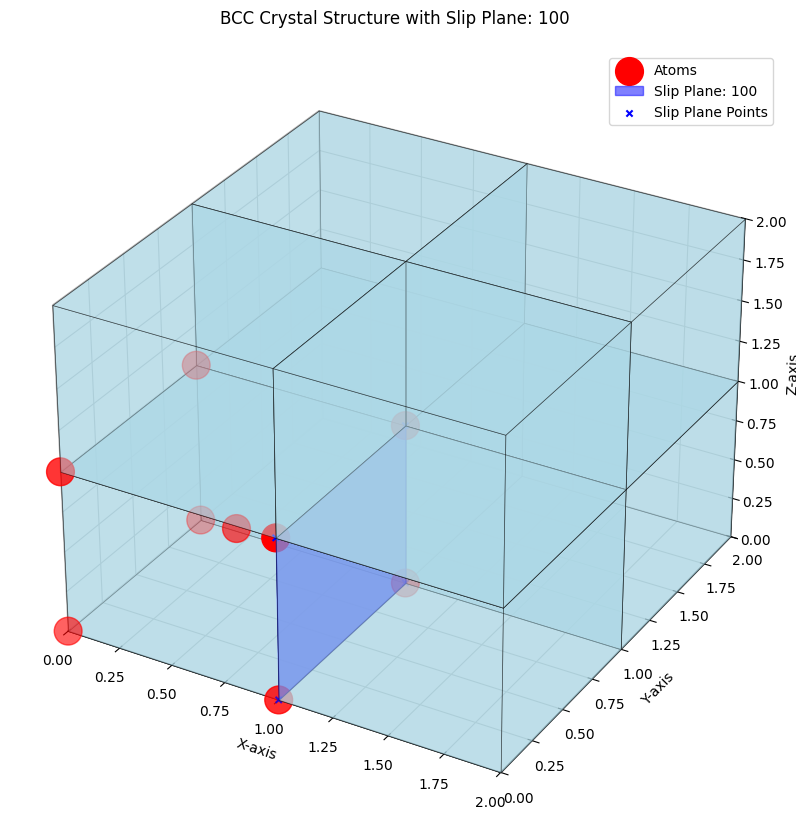

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

def draw_unit_cells_with_atoms(ax, points, min_coord=0, max_coord=2):
    """Drawing unit cells with selectively colored faces for cells containing atoms."""
    base_cube_points = [
        (0, 0, 0), (1, 0, 0), (1, 1, 0), (0, 1, 0),
        (0, 0, 1), (1, 0, 1), (1, 1, 1), (0, 1, 1)
    ]

    for i in range(min_coord, max_coord):
        for j in range(min_coord, max_coord):
            for k in range(min_coord, max_coord):
                atom_in_cell = any(
                    i <= x < i + 1 and j <= y < j + 1 and k <= z < k + 1
                    for x, y, z in points
                )

                if atom_in_cell:
                    cube_points = [(x + i, y + j, z + k) for x, y, z in base_cube_points]

                    faces = [
                        [cube_points[0], cube_points[1], cube_points[5], cube_points[4]],
                        [cube_points[2], cube_points[3], cube_points[7], cube_points[6]],
                        [cube_points[0], cube_points[4], cube_points[7], cube_points[3]],
                        [cube_points[1], cube_points[5], cube_points[6], cube_points[2]],
                        [cube_points[0], cube_points[1], cube_points[2], cube_points[3]],
                        [cube_points[4], cube_points[5], cube_points[6], cube_points[7]],
                    ]

                    face_colors = 'lightblue'
                    for face in faces:
                        poly = Poly3DCollection(
                            [face], alpha=0.5, edgecolor='black', linewidths=0.5, facecolor=face_colors
                        )
                        ax.add_collection3d(poly)

def plot_crystal_structure_with_slip(structure, slip_plane=None, slip_coords=None):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(f'{structure} Crystal Structure with Slip Plane: {slip_plane}', pad=20)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')

    if structure == "BCC":
        points = [(0, 0, 0), (1, 0, 0), (0, 1, 0), (0, 0, 1),
                  (1, 1, 0), (1, 0, 1), (0, 1, 1), (1, 1, 1), (0.5, 0.5, 0.5)]
    elif structure == "FCC":
        points = [(0, 0, 0), (1, 0, 0), (0, 1, 0), (0, 0, 1),
                  (1, 1, 0), (1, 0, 1), (0, 1, 1), (1, 1, 1),
                  (0.5, 0.5, 0), (0.5, 0, 0.5), (0, 0.5, 0.5),
                  (0.5, 0.5, 1), (0.5, 1, 0.5), (1, 0.5, 0.5)]

    draw_unit_cells_with_atoms(ax, points, min_coord=0, max_coord=2)

    x, y, z = zip(*points)
    ax.scatter(x, y, z, c='r', marker='o', s=400, label="Atoms")

    if slip_plane and slip_coords:
        poly = Poly3DCollection([slip_coords], alpha=0.5, color='blue', label=f"Slip Plane: {slip_plane}")
        ax.add_collection3d(poly)
        sx, sy, sz = zip(*slip_coords)
        ax.scatter(sx, sy, sz, c='b', marker='x', label="Slip Plane Points")

    ax.set_xlim([0, 2])
    ax.set_ylim([0, 2])
    ax.set_zlim([0, 2])
    ax.legend()
    plt.show()

def visualize_schmids_law():
    print("Let's load along the <001> direction.")
    print("Let's consider the slip system <110><111>.")
    print("Phi1 angle (<100>, <110>) = 30 degrees.")
    print("Phi2 angle (<111>, <100>) = 60 degrees.")
    print("Let's consider 1000 N along the loading direction (sigma).")

    phi1 = np.radians(30)  # Converting degrees to radians
    phi2 = np.radians(60)  # Converting degrees to radians
    sigma = 1000  # Load in N

    schmid_factor = sigma * np.cos(phi1) * np.cos(phi2)
    print(f"Therefore, Schmid's factor = sigma * cos(phi1) * cos(phi2) = {schmid_factor:.2f}")

    # Visualization
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title("Schmid's Law Visualization", pad=20)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')

    # Draw hollow cylinder
    z = np.linspace(0, 3, 100)
    theta = np.linspace(0, 2 * np.pi, 100)
    theta_grid, z_grid = np.meshgrid(theta, z)
    x_grid = 1 * np.cos(theta_grid)
    y_grid = 1 * np.sin(theta_grid)
    ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.1, color='gray', edgecolor='none')

    # Draw slip plane (elliptical)
    theta = np.linspace(0, 2 * np.pi, 100)
    a, b = 1, 0.8
    x_ellipse = a * np.cos(theta)
    y_ellipse = b * np.sin(theta)
    z_ellipse = 1.5 + 0.5 * np.sin(theta) + 0.3 * np.cos(theta)  # Tilt the elliptical plane along x and y axes
    ax.plot_trisurf(x_ellipse, y_ellipse, z_ellipse, alpha=0.5, color='blue', label='(111) Tilted Slip Plane')

    # Arrows
    arrow_scale = 1.5  # Scale for larger arrows
    ax.quiver(0, 0, 1.5, 0, 0, arrow_scale, color='red', label='Force Direction', arrow_length_ratio=0.2, linewidth=2)
    ax.quiver(0, 0, 1.5, arrow_scale * 0.8, 0, 0, color='green', label='Shear Direction', arrow_length_ratio=0.2, linewidth=2)

    # Orange arrow shifted upwards beside the red arrow
    normal_x = 0.3  # Derived from tilt parameters of the elliptical plane
    normal_y = 0.5
    normal_z = 1.5  # Increased Z-component to shift upwards
    ax.quiver(0, 0, 1.5, -arrow_scale * normal_x, -arrow_scale * normal_y, -arrow_scale * normal_z, color='orange', label='Normal Direction', arrow_length_ratio=0.2, linewidth=2)

    ax.legend()
    plt.show()



def main_colab():
    print("Welcome to the journey of learning Crystal Plasticity!")
    print("What do you want to learn today?")
    print("1. Visualize Unit Cells")
    print("2. Visualize Slip Planes")
    print("3. Visualize Schmid's Law")

    choice = input("Enter your choice (1, 2, or 3): ")

    if choice == "1":
        print("Select Crystal Structure:")
        print("1. BCC")
        print("2. FCC")
        structure_choice = input("Enter your choice (1 or 2): ")
        structure = "BCC" if structure_choice == "1" else "FCC"
        plot_crystal_structure_with_slip(structure)

    elif choice == "2":
        print("Select Crystal Structure:")
        print("1. BCC")
        print("2. FCC")
        structure_choice = input("Enter your choice (1 or 2): ")
        structure = "BCC" if structure_choice == "1" else "FCC"

        slip_planes = {
            "BCC": {
                "001": [(0, 0, 1), (1, 0, 1), (1, 1, 1), (0, 1, 1)],
                "100": [(1, 0, 0), (1, 1, 0), (1, 1, 1), (1, 0, 1)],
                "010": [(0, 1, 0), (1, 1, 0), (1, 1, 1), (0, 1, 1)],
                "112": [(1, 0, 0), (0, 1, 0), (0, 0, 0.5)],
                "123": [(1, 0, 0), (0, 0.5, 0), (0, 0, 0.33)],
                "011": [(0, 0, 0), (0, 1, 0), (0, 0, 1)],
            },
            "FCC": {
                "111": [(0, 0, 1), (0, 1, 0), (1, 0, 0)],
                "-111": [(-1, 0, 0), (1, 0, 0), (0, 0, 1)],
                "1-11": [(1, 0, 0), (0, -1, 0), (0, 0, 1)],
                "-1-11": [(-1, 0, 0), (0, -1, 0), (0, 0, 1)],
            },
        }

        if structure == "BCC":
            print("Select Slip Plane:")
            print("1. 001")
            print("2. 100")
            print("3. 010")
            print("4. 112")
            print("5. 123")
            print("6. 011")
            plane_choice = input("Enter your choice (1, 2, 3, 4, 5, or 6): ")
            if plane_choice in ["1", "2", "3", "4", "5", "6"]:
                slip_plane = ["001", "100", "010", "112", "123", "011"][int(plane_choice) - 1]
                slip_coords = slip_planes["BCC"][slip_plane]
                plot_crystal_structure_with_slip("BCC", slip_plane, slip_coords)
            else:
                print("Invalid choice. Please restart and try again.")

        elif structure == "FCC":
            print("Select Slip Plane:")
            print("1. 111")
            print("2. -111")
            print("3. 1-11")
            print("4. -1-11")
            plane_choice = input("Enter your choice (1, 2, 3, or 4): ")
            if plane_choice in ["1", "2", "3", "4"]:
                slip_plane = ["111", "-111", "1-11", "-1-11"][int(plane_choice) - 1]
                slip_coords = slip_planes["FCC"][slip_plane]
                plot_crystal_structure_with_slip("FCC", slip_plane, slip_coords)
            else:
                print("Invalid choice. Please restart and try again.")

    elif choice == "3":
        visualize_schmids_law()
    else:
        print("Invalid choice. Please restart and try again.")

# Run the program
main_colab()


